# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


    
query_url = f"{url}appid={weather_api_key}&units={units}&q="





In [4]:
weather_api_key

'bef8ec74a66381fcf64316b729bebc5e'

In [5]:


# Define an empty list to fetch the weather data for each city

lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(query_url + city).json()
    
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
   
 

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ayagoz
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | bambous virieux
Processing Record 8 of Set 1 | nahrin
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | kashi
Processing Record 17 of Set 1 | saint-pierre
Processing Record 18 of Set 1 | skjervoy
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | te anau
Processing Record 22 of Set 1 | grants
Processing R

In [6]:
len(lat)
len(temp)

603

In [7]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

city_data_df = city_data_df.dropna(how="any")
print(city_data_df.count())



City          556
Lat           556
lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,81.01,55.0,40.0,13.00,US,1.689618e+09
1,bethel,41.3712,-73.4140,88.90,59.0,0.0,4.61,US,1.689618e+09
2,ayagoz,47.9714,80.4392,66.58,45.0,0.0,9.46,KZ,1.689618e+09
3,chapais,49.7834,-74.8492,65.98,50.0,26.0,12.95,CA,1.689618e+09
4,east london,-33.0153,27.9116,59.94,77.0,0.0,4.61,ZA,1.689618e+09


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,81.01,55.0,40.0,13.00,US,1.689618e+09
1,bethel,41.3712,-73.4140,88.90,59.0,0.0,4.61,US,1.689618e+09
2,ayagoz,47.9714,80.4392,66.58,45.0,0.0,9.46,KZ,1.689618e+09
3,chapais,49.7834,-74.8492,65.98,50.0,26.0,12.95,CA,1.689618e+09
4,east london,-33.0153,27.9116,59.94,77.0,0.0,4.61,ZA,1.689618e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

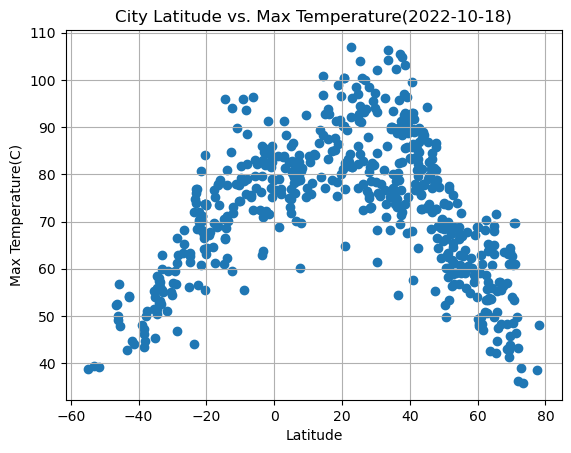

In [11]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")
# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature(2022-10-18)")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

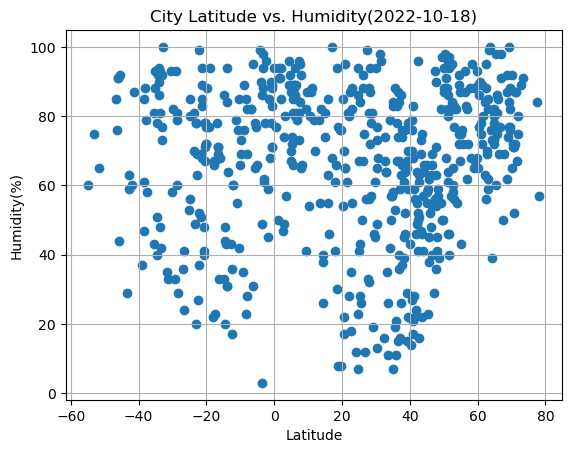

In [12]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

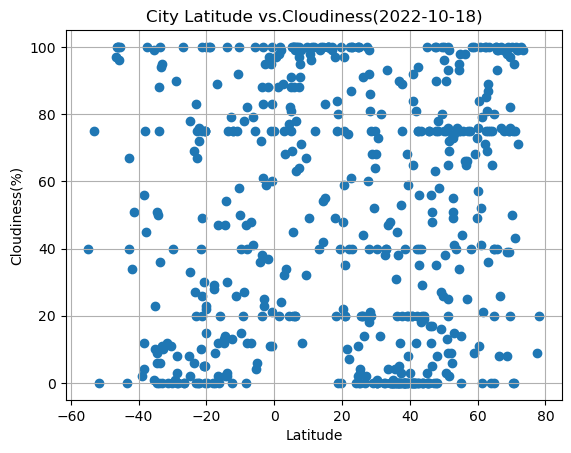

In [13]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
# Incorporate the other graph properties

plt.title("City Latitude vs.Cloudiness(2022-10-18)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

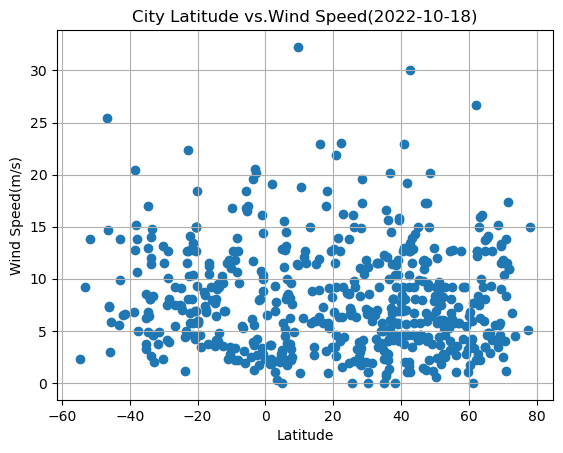

In [14]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
# Incorporate the other graph properties

plt.title("City Latitude vs.Wind Speed(2022-10-18)")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(10,8))
    plt.scatter(x_values, y_values,alpha = 0.80, edgecolors = "k", linewidths = 1)
    plt.xlabel(x_label,fontsize = 14)
    plt.ylabel(y_label,fontsize = 14)
    if ylim is not None:
        plt.ylim(0, ylim)
    today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {today}",fontsize = 15)
    plt.annotate(line_eq,xy=(10, 50),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(-50, 40),fontsize=22,xycoords='data',xytext=(0.4, 0.3), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    plt.annotate(line_eq,xy=(10, 25),fontsize=22,xycoords='data',xytext=(0.4, 0.4), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    return plt.plot(x_values,regress_values,"r-")



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,81.01,55.0,40.0,13.00,US,1.689618e+09
1,bethel,41.3712,-73.4140,88.90,59.0,0.0,4.61,US,1.689618e+09
2,ayagoz,47.9714,80.4392,66.58,45.0,0.0,9.46,KZ,1.689618e+09
3,chapais,49.7834,-74.8492,65.98,50.0,26.0,12.95,CA,1.689618e+09
7,nahrin,36.0649,69.1334,78.60,21.0,0.0,4.05,AF,1.689618e+09


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,east london,-33.0153,27.9116,59.94,77.0,0.0,4.61,ZA,1.689618e+09
5,busselton,-33.6500,115.3333,57.27,81.0,100.0,13.98,AU,1.689618e+09
6,bambous virieux,-20.3428,57.7575,73.65,78.0,75.0,14.97,MU,1.689618e+09
8,rikitea,-23.1203,-134.9692,73.83,78.0,83.0,11.50,PF,1.689618e+09
11,ushuaia,-54.8000,-68.3000,38.86,60.0,40.0,2.30,AR,1.689618e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4305339624322424


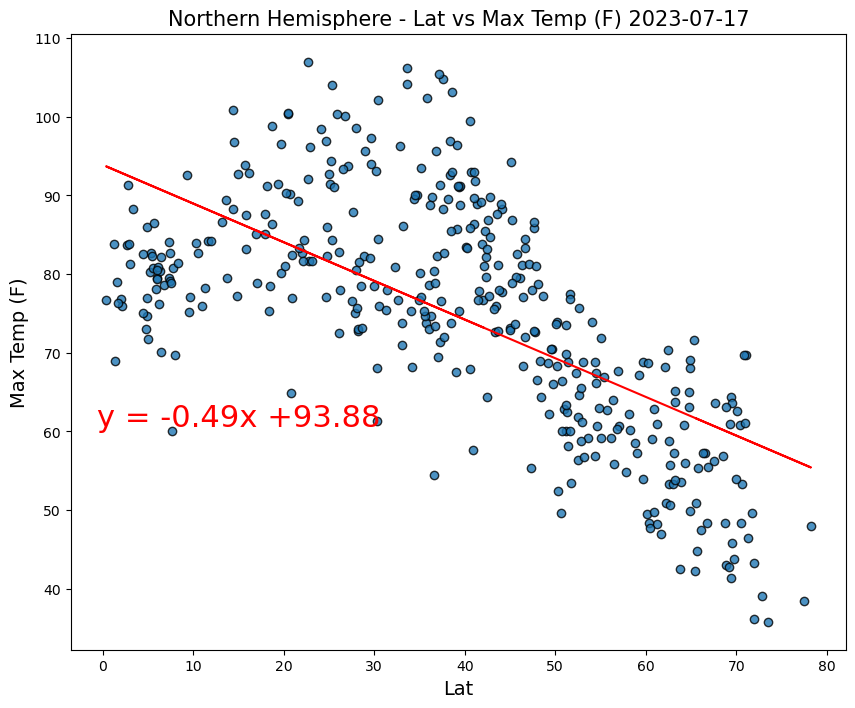

In [18]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Lat", "Max Temp (F)", "Northern",(0, 0))
plt.savefig("./output_data/Northern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


The r-squared is: 0.0036365728696569222


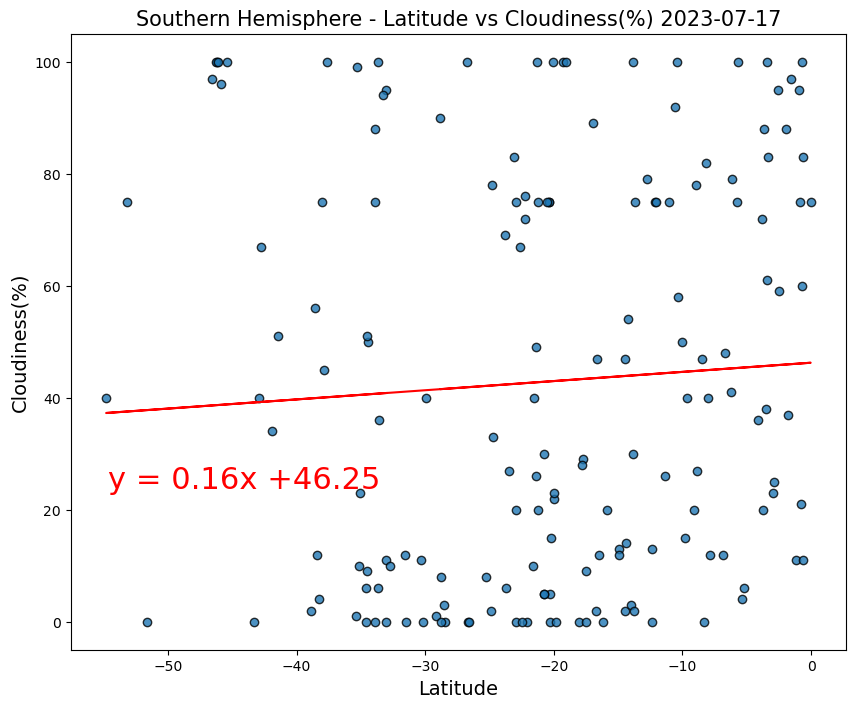

In [19]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))

plt.savefig("./output_data/southern_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()


**Discussion about the linear relationship:** When it comes to Northern Hemisphere, there is a strong linear relationship between latitude and temperature, with temperatures being higher when latitude is lower and vice versa. This is supported by r-squared value of 0.42. When it comes to Southern Hemisphere, the linear relationship is weak and possibly this analysis would require a method other than linear regression. This is also supported by low r-squared value. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.007226132790174088


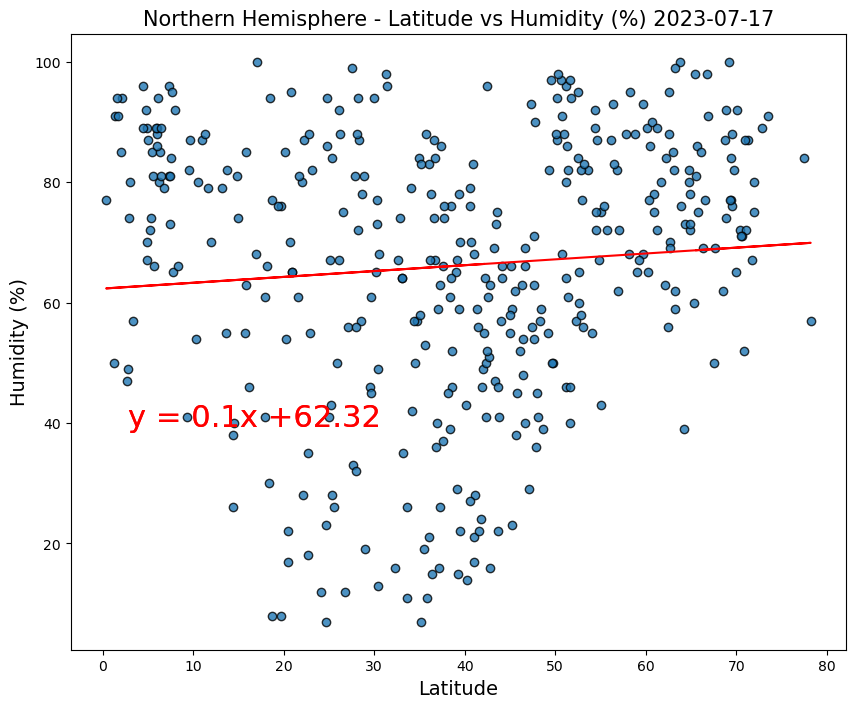

In [20]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(40, 20))
plt.savefig("./output_data/Northern_Hemisphere_Humidity_Latitude_Linear.png", bbox_inches="tight")
plt.show()


The r-squared is: 0.007226132790174088


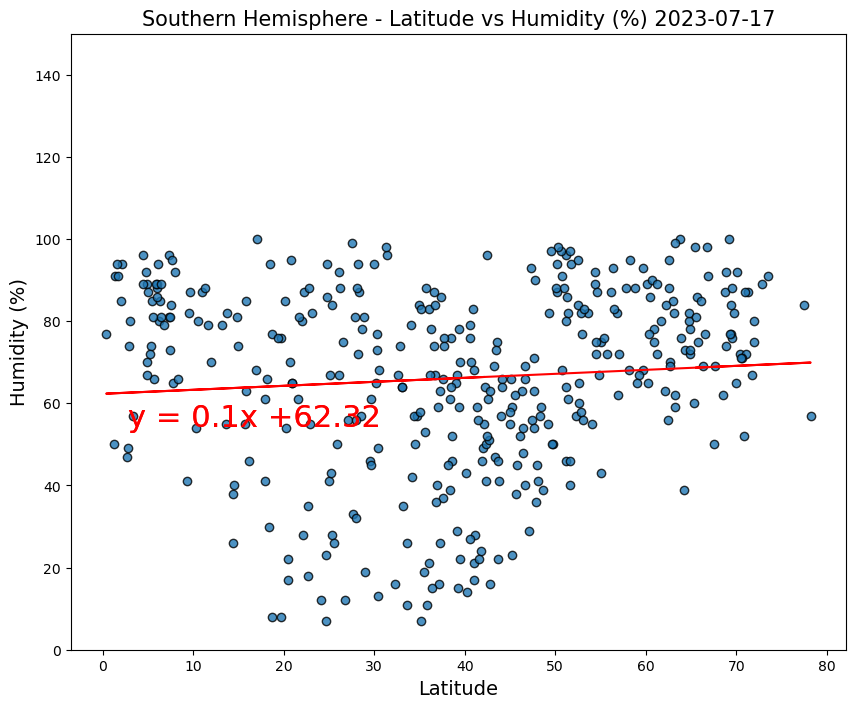

In [21]:
# Southern Hemisphere

x_values1 = southern_hemi_df['Lat']
y_values1 = southern_hemi_df['Humidity']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(40, 20), 150)
plt.savefig("./output_data/southern_humidity_Hemisphere_Max_lat_lin.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** The linear relationship between humidity and latitude is not too strong - it seems that humidity is very slightly higher at lower latitude . The r-squared values are low as well. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002624353883672366


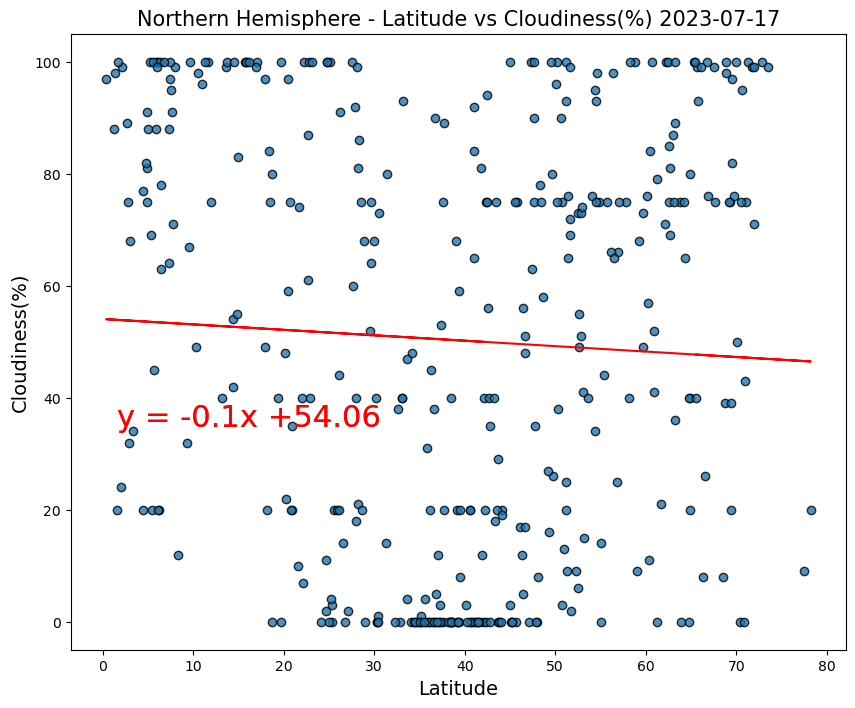

In [22]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Northern",(30, 50))

plt.savefig("./output_data/Northern Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()


The r-squared is: 0.0036365728696569222


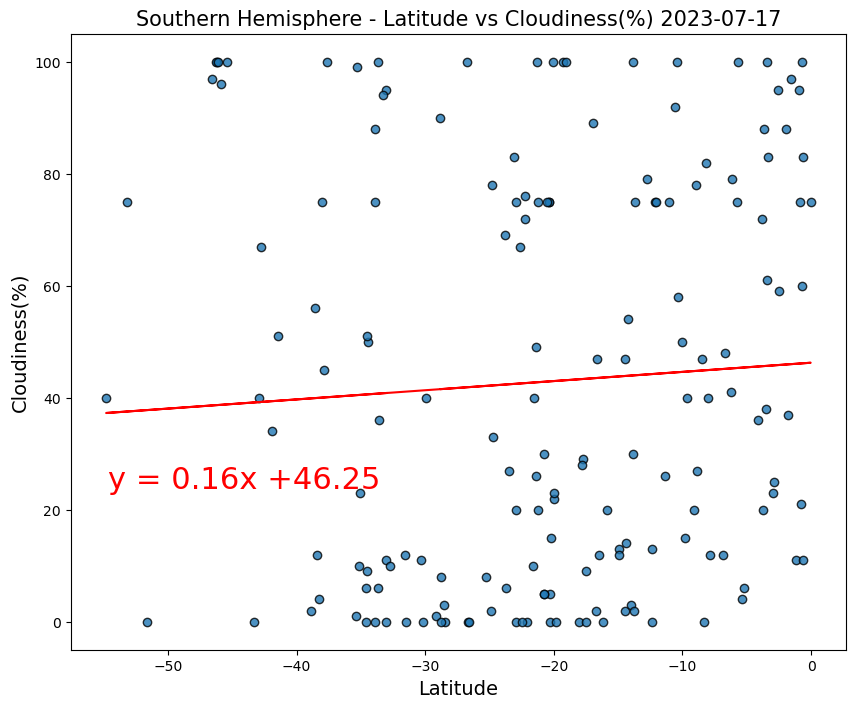

In [23]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/Southern_Hemisphere_Cloudiness_Latitude_Linear.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** Linear regression may not be the best method of analysis in this case. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00010405263313721284


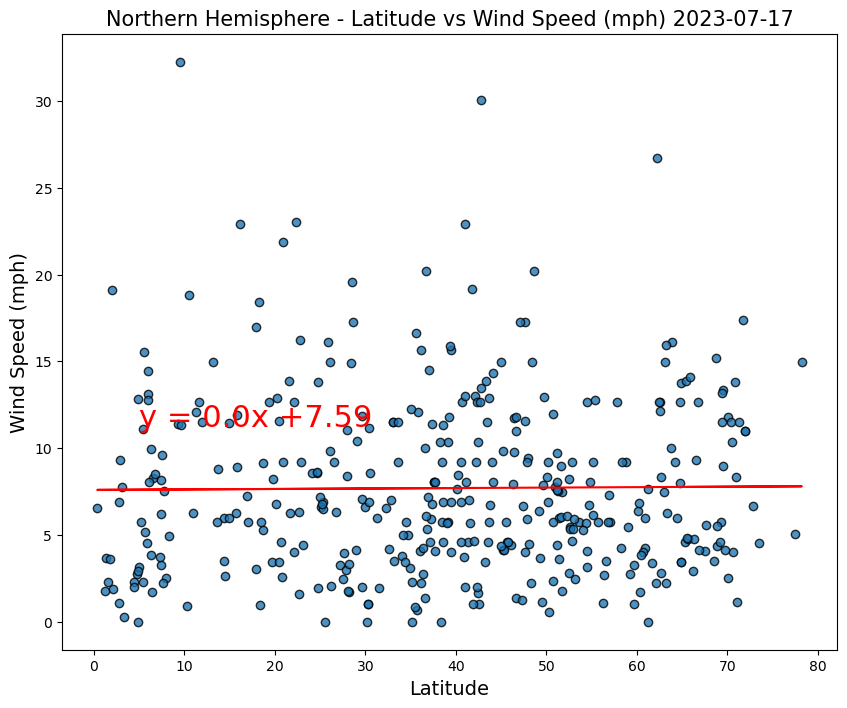

In [24]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/Northern_Hemisphere_Wind_Speed_Latitude_Lin.png", bbox_inches="tight")
plt.show()

The r-squared is: 0.001837170824692838


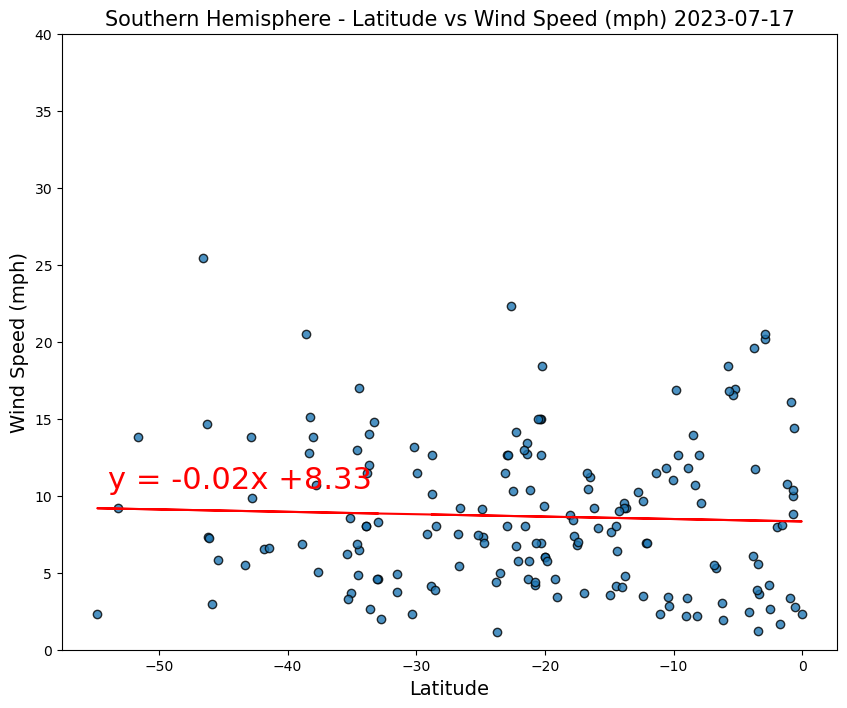

In [25]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/Southern_Hemisphere_Wind_Speed_Latitude_Linear_Regression.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE